In [1]:
import numpy as np

from sklearn.linear_model import LogisticRegression
# 多項式・交互作用特徴量の生成
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
# 予測結果の精度確認（ROC曲線の描画）
from sklearn.metrics import roc_auc_score, roc_curve
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
import japanize_matplotlib

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## 訓練データの読み込み

In [2]:

def MedcDataChange(df_x):
    categ_cols = ['Age','Gender']
    contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']


    ####################################
    ##  データ分割
    ##  説明変数と目的変数に分ける。
    ##  説明変数はカテゴリデータと連続データに分ける。
    ####################################
    x_cate = df_x[categ_cols].copy()
    x_cont = df_x[contin_cols].copy()

    ####################################
    ##  カテゴリデータ
    ##  値変換
    ####################################

    # --------------------------------------
    # Ageの変換の変換
    # '0'  ～18歳未満
    # '1'  18歳～25歳未満
    # '2'  25歳～30歳未満
    # '3'  30歳～35歳未満
    # '4'  35歳～40歳未満
    # '5'  40歳～50歳未満
    # '6'  50歳～60歳未満
    # '7'  60歳～70歳未満
    # '8'  70歳～80歳未満
    # '9'  80歳～
    bins = [0, 18, 25, 30, 35, 40, 50, 60, 70, 80 ,1000]
    #X_cut = pd.cut(x_cate['Age'], bins=bins, labels=['Age' + str(x) for x in range(len(bins)-1)])
    X_cut = pd.cut(x_cate['Age'], bins=bins, labels=False)
    cutTemp = np.zeros((len(X_cut), len(bins) -1 ), dtype=int)
    cutTemp[np.arange(len(X_cut)), X_cut.T] = 1
    df_cut=pd.DataFrame(cutTemp ,columns=['Age' + str(x) for x in range(cutTemp.shape[1])])
    # 列の削除
    x_cate.drop(columns=['Age'], inplace=True, axis=1)
    # 列の追加
    x_cate = pd.concat([x_cate, df_cut], axis=1)

    # --------------------------------------
    # 性別を変換する
    colval=['Female','Male']
    # 初期値０の列を作成する
    for col in colval:
        x_cate[col]=0

    # カテゴリ毎に値編集
    for col in colval:
        x_cate.loc[x_cate['Gender']==col, col]=1
    x_cate.drop(columns=['Gender'],inplace=True)

    return x_cate , x_cont 


def TrainNpToPy(x_cate, x_cont, df_y ):

    #x_temp = pd.concat([x_cate , x_cont] , axis=1)
    x_temp = x_cont.copy()
    x_temp = np.array(x_temp)
    y_temp = np.array(df_y)

    # 訓練データと検証データに分割
    x_train,x_test,y_train,y_test=train_test_split(x_temp, y_temp, test_size=0.2, random_state=1) 

    in_size  = X_train.shape[1]
    out_size = Y_train.shape[1]

    
    
def StdScale(x_cont):

    bai = 3
    
    col='T_Bil'
    std=x_desc.loc['75%',col]*bai
    std=x_cont.loc[x_cont[col]<(std),col].max()
    x_cont.loc[x_cont[col]>std , col]=std
    
    col='D_Bil'
    std=x_desc.loc['75%',col]*bai
    std=x_cont.loc[x_cont[col]<(std),col].max()
    x_cont.loc[x_cont[col]>std , col]=std

    col='ALP'
    #std=x_desc.loc['75%',col]*bai
    #std=x_cont.loc[x_cont[col]<(std),col].max()
    std=250
    x_cont.loc[x_cont[col]>std , col]=std
    std=190
    x_cont.loc[x_cont[col]<std , col]=std
    
    col='ALT_GPT'
    #std=x_desc.loc['75%',col]*bai
    #std=x_cont.loc[x_cont[col]<(std),col].max()
    std=60
    x_cont.loc[x_cont[col]>std , col]=std

    col='AST_GOT'
    #std=x_desc.loc['75%',col]*bai
    #std=x_cont.loc[x_cont[col]<(std),col].max()
    std=140
    x_cont.loc[x_cont[col]>std , col]=std

    col='Alb'
    #std=x_desc.loc['75%',col]*bai
    #std=x_cont.loc[x_cont[col]<(std),col].max()
    std=4.5
    x_cont.loc[x_cont[col]>std , col]=std

    col='AG_ratio'
    #std=x_desc.loc['75%',col]*bai
    #std=x_cont.loc[x_cont[col]<(std),col].max()
    std=1.7
    x_cont.loc[x_cont[col]>std , col]=std

    col='TP'
    std=5.5
    x_cont.loc[x_cont[col]<std , col]=std
    
    return x_cont

def MaxScale(x_cont):

    col='T_Bil'
    if std_scale == 1:
        maxval=x_desc.loc['std',col]*3
    else:
        maxval=x_desc.loc['max',col]
    x_cont.loc[:,col]=x_cont.loc[:,col]/maxval

    col='D_Bil'
    if std_scale == 1:
        maxval=x_desc.loc['std',col]*3
    else:
        maxval=x_desc.loc['max',col]
    x_cont.loc[:,col]=x_cont.loc[:,col]/maxval

    col='ALP'
    if std_scale == 1:
        maxval=x_desc.loc['std',col]*3
    else:
        maxval=x_desc.loc['max',col]
    x_cont.loc[:,col]=x_cont.loc[:,col]/maxval

    col='ALT_GPT'
    if std_scale == 1:
        maxval=x_desc.loc['std',col]*3
    else:
        maxval=x_desc.loc['max',col]
    x_cont.loc[:,col]=x_cont.loc[:,col]/maxval

    col='AST_GOT'
    if std_scale == 1:
        maxval=x_desc.loc['std',col]*3
    else:
        maxval=x_desc.loc['max',col]
    x_cont.loc[:,col]=x_cont.loc[:,col]/maxval

    col='TP'
    maxval=x_desc.loc['max',col]
    x_cont.loc[:,col]=x_cont.loc[:,col]/maxval
    x_cont.loc[:,col]=1-x_cont.loc[:,col]

    col='Alb'
    maxval=x_desc.loc['max',col]
    x_cont.loc[:,col]=x_cont.loc[:,col]/maxval
    x_cont.loc[:,col]=1-x_cont.loc[:,col]

    col='AG_ratio'
    maxval=x_desc.loc['max',col]
    x_cont.loc[:,col]=x_cont.loc[:,col]/maxval
    x_cont.loc[:,col]=1-x_cont.loc[:,col]
    
    return x_cont

def DobuleScale(x_cont):

    col='T_Bil'
    x_cont.loc[:,col]=x_cont.loc[:,col]*x_cont.loc[:,col]

    col='D_Bil'
    x_cont.loc[:,col]=x_cont.loc[:,col]*x_cont.loc[:,col]

    col='ALP'
    x_cont.loc[:,col]=x_cont.loc[:,col]*x_cont.loc[:,col]

    col='ALT_GPT'
    x_cont.loc[:,col]=x_cont.loc[:,col]*x_cont.loc[:,col]

    col='AST_GOT'
    x_cont.loc[:,col]=x_cont.loc[:,col]*x_cont.loc[:,col]

    col='TP'
    x_cont.loc[:,col]=x_cont.loc[:,col]*x_cont.loc[:,col]

    col='Alb'
    x_cont.loc[:,col]=x_cont.loc[:,col]*x_cont.loc[:,col]

    col='AG_ratio'
    x_cont.loc[:,col]=x_cont.loc[:,col]*x_cont.loc[:,col]

    return x_cont
    
def PolynomialTrance(x_cont):

    col1='T_Bil'
    col2='D_Bil'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='T_Bil'
    col2='ALP'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='D_Bil'
    col2='ALP'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='ALT_GPT'
    col2='AST_GOT'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='ALT_GPT'
    col2='T_Bil'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='ALT_GPT'
    col2='D_Bil'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='ALT_GPT'
    col2='ALP'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='AST_GOT'
    col2='T_Bil'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='AST_GOT'
    col2='D_Bil'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='AST_GOT'
    col2='ALP'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='TP'
    col2='Alb'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='TP'
    col2='AG_ratio'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    col1='Alb'
    col2='AG_ratio'
    x_cont[col1 + '_' + col2]=x_cont[col1] * x_cont[col2]

    return x_cont

def snsPlot(x_cont, df_y):
    # seabornで相関係数を描画
    plt.figure(figsize=(15,15))
    df_sns = pd.concat([x_cont , df_y] , axis=1)
    sns.heatmap(df_sns.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
    plt.show()
    
def boxPlot(x_cont, df_y ):

    df_sns = pd.concat([x_cont , df_y] , axis=1)

    fig, ax = plt.subplots(3,3,figsize=(20,20))
    sns.boxplot(x="disease",y="T_Bil",data=df_sns,ax=ax[0][0])
    sns.boxplot(x="disease",y="D_Bil",data=df_sns,ax=ax[0][1])
    sns.boxplot(x="disease",y="ALP",data=df_sns,ax=ax[0][2])
    sns.boxplot(x="disease",y="ALT_GPT",data=df_sns,ax=ax[1][0])
    sns.boxplot(x="disease",y="AST_GOT",data=df_sns,ax=ax[1][1])
    sns.boxplot(x="disease",y="TP",data=df_sns,ax=ax[1][2])
    sns.boxplot(x="disease",y="Alb",data=df_sns,ax=ax[2][0])
    sns.boxplot(x="disease",y="AG_ratio",data=df_sns,ax=ax[2][1])
    plt.tight_layout()

def binSplit(x_cont):
    # T_Bilの変換
    col = 'T_Bil'
    bins = [0,  0.85,  1.5,   100]
    x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)

    # D_Bilの変換
    col = 'D_Bil'
    bins = [0,  0.18, 0.21,  0.3,  100]
    x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)

    # ALPの変換
    col = 'ALP'
    bins = [0,  210, 220, 230, 600,  2500]
    x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)

    # ALT_GPTの変換
    col = 'ALT_GPT'
    bins = [0,  15,   20,   40,  1500]
    x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)

    # AST_GOTの変換
    col = 'AST_GOT'
    bins = [0,  22,   30,   75,   1000]
    x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)

    # TPの変換
    col = 'TP'
    bins = [0,  6.0,  6.8,  7,  7.5,  8,  1000]
    x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)

    # Albの変換
    col = 'Alb'
    bins = [0,  3.0,  3.3,  3.6, 3.7, 3.8,1000]
    x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)

    # AG_ratioの変換
    col = 'AG_ratio'
    bins = [0, 1.0,  1.05,  1.1, 1.2, 1.3, 1000]
    x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)
    
    return x_cont


In [16]:
def binSplit2(x_cont):
    contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']
    
    for col in contin_cols:
        split_min = 0
        split_min2 = df_desc.loc['min',col]
        split1 = df_desc.loc['25%',col]
        split2 = df_desc.loc['50%',col]
        split3 = df_desc.loc['75%',col]
        std_m = df_desc.loc['std',col]/3
        std_p = df_desc.loc['std',col]*3
        split_max=  df_desc.loc['max',col]
        split_max2=  df_desc.loc['max',col]*10
        bins = [split_min,  split_min2, split1,  split2,  split3, std_m,  std_p,  split_max, split_max2]
        bins = np.sort(bins)
        x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)
    
    x_cont.drop(columns=['TP'], inplace=True)
    return x_cont
        
    

In [141]:
def binSplit3(x_cont):
    contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']
    
    for col in contin_cols:
        split_min = 0
        split_min2 = df_desc.loc['min',col]*10
        split_min3 = df_desc.loc['min',col]
        split1 = df_desc.loc['25%',col]
        split2 = df_desc.loc['50%',col]
        split3 = df_desc.loc['75%',col]
        std_m = df_desc.loc['std',col]/3
        std_p = df_desc.loc['std',col]*3
        split_max=  df_desc.loc['max',col]
        split_max2=  df_desc.loc['max',col]*10
        bins = [split_min,  split_min2, split_min3, split1,  split2,  split3, std_m,  std_p,  split_max, split_max2]
        
        if col == 'T_Bil':
            bins.append(0.2)
            bins.append(1.2)
        elif col == 'T_Bil':
            bins.append(0.4)
        elif col == 'ALP':
            bins.append(100.0)
            bins.append(35.0)
        elif col == 'ALT_GPT':
            bins.append(30.0)
        elif col == 'AST_GOT':
            bins.append(30.0)
        elif col == 'TP':
            bins.append(6.5)
            bins.append(7.9)
        elif col == 'TP':
            bins.append(3.2)
            bins.append(4.6)
        elif col == 'AG_ratio':
            bins.append(1.2)
            bins.append(2.0)
        
        bins = np.sort(bins)
        x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)
    
    x_cont.drop(columns=['TP'], inplace=True)
    return x_cont
    

In [142]:
# CSVファイル読み込み（訓練データ）
df_train = pd.read_csv('train.csv')
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [143]:
df_y = df_train['disease'].copy()
x_cate , x_cont = MedcDataChange(df_train.drop(['disease'], axis=1).copy())

In [144]:
sigma=df_train.std()
df_desc = df_train.describe()
df_desc

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706
std,16.453672,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000
25%,32.000000,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000
50%,48.000000,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000
75%,62.000000,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000
max,78.000000,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.016970,1.821496,1.000000


## 評価データの読み込み

In [145]:
# CSVファイル読み込み（評価データ）
df_vat = pd.read_csv('test.csv')
df_vat.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [146]:
# 性別を変換する（評価データ）
x_cate_vat , x_cont_vat = MedcDataChange(df_vat.copy())

## データ加工

#### 訓練データのデータ加工前処理

In [147]:
x_tmp=binSplit3(x_cont.copy())

In [148]:
x_tmp.describe()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,Alb,AG_ratio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,4.470588,2.970588,5.558824,2.836471,3.456471,4.498824,4.992941
std,2.126662,1.845079,1.230530,1.767482,2.210610,1.121846,1.599454
min,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000
25%,2.250000,1.250000,4.250000,1.250000,1.250000,3.250000,3.250000
50%,4.500000,2.500000,5.500000,2.500000,2.500000,4.500000,5.500000
75%,6.500000,3.750000,6.750000,3.750000,5.750000,5.750000,6.750000
max,9.000000,7.000000,9.000000,8.000000,8.000000,6.000000,7.000000


In [149]:
x_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   T_Bil     850 non-null    int64
 1   D_Bil     850 non-null    int64
 2   ALP       850 non-null    int64
 3   ALT_GPT   850 non-null    int64
 4   AST_GOT   850 non-null    int64
 5   Alb       850 non-null    int64
 6   AG_ratio  850 non-null    int64
dtypes: int64(7)
memory usage: 46.6 KB


In [150]:
x_tmp.shape

(850, 7)

In [151]:
df_tmp = pd.concat([x_tmp, df_train.loc[:,['disease']]] ,axis=1)

# 重複レコードがあれば削除する
df_tmp.drop_duplicates(inplace=True)
# インデックスを採番しなおす
df_tmp.reset_index(drop=True, inplace=True)

In [152]:
df_tmp.describe()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,Alb,AG_ratio,disease
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,4.584574,3.008119,5.615697,2.935047,3.625169,4.489851,4.937754,0.480379
std,2.119552,1.892057,1.258498,1.822355,2.205306,1.136172,1.611753,0.499953
min,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000
25%,3.000000,1.000000,4.000000,1.000000,2.000000,3.000000,3.000000,0.000000
50%,5.000000,2.000000,6.000000,3.000000,3.000000,4.000000,4.000000,0.000000
75%,7.000000,5.000000,7.000000,4.000000,6.000000,6.000000,6.000000,1.000000
max,9.000000,7.000000,9.000000,8.000000,8.000000,6.000000,7.000000,1.000000


In [153]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   T_Bil     739 non-null    int64
 1   D_Bil     739 non-null    int64
 2   ALP       739 non-null    int64
 3   ALT_GPT   739 non-null    int64
 4   AST_GOT   739 non-null    int64
 5   Alb       739 non-null    int64
 6   AG_ratio  739 non-null    int64
 7   disease   739 non-null    int64
dtypes: int64(8)
memory usage: 46.3 KB


In [154]:
df_tmp.loc[df_tmp['T_Bil'].isnull() == True,:]

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,Alb,AG_ratio,disease


In [155]:
np.log(x_cont.loc[356,'T_Bil'])

-0.1710883779703424

In [156]:
# 説明変数（訓練データ）
x_train = np.array(df_tmp.drop(['disease'],axis=1))

# 目的変数（訓練データ）
y_train = np.array(df_tmp.loc[:,['disease']])


#### 評価データのデータ加工前処理

In [157]:
x_tmp=binSplit3(x_cont_vat.copy())

In [158]:
x_tmp.describe()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,Alb,AG_ratio
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,4.480000,2.857143,5.640000,2.785714,3.274286,4.497143,5.028571
std,2.065795,1.733586,1.260645,1.701953,2.184649,1.149931,1.574978
min,2.000000,1.000000,4.000000,1.000000,0.000000,3.000000,2.000000
25%,3.000000,2.000000,5.000000,1.000000,1.000000,3.000000,4.000000
50%,5.000000,2.500000,6.000000,2.000000,2.000000,4.000000,6.000000
75%,5.000000,3.000000,7.000000,3.000000,5.000000,6.000000,7.000000
max,10.000000,8.000000,9.000000,8.000000,8.000000,6.000000,7.000000


In [159]:
x_tmp.shape

(350, 7)

In [160]:
x_vat = np.array(x_tmp)

## 訓練

In [161]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

In [162]:
# モデルの学習・予測
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

## 検証データを使って予測値の検証

In [163]:
# 検証 <-訓練データ 
model.score(X_train ,Y_train)

0.8411552346570397

In [164]:
# 検証 <-検証データ
# (検証データと値が近いなら信用できる。
#  どこまでの差異を近いとするかはそれぞれ
#  判断する必要がある。)
model.score(X_test,Y_test)

0.8

## ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）

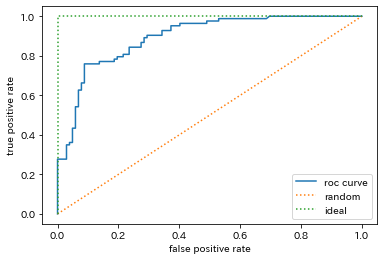

[1.9987522  0.9987522  0.95815887 0.95094523 0.93387993 0.9315467
 0.930584   0.91115143 0.88878919 0.88116273 0.83027783 0.81945999
 0.78221833 0.7815135  0.77376761 0.77251097 0.6923661  0.60927995
 0.60892922 0.52491145 0.51112175 0.46756112 0.45446686 0.42628478
 0.41903885 0.40529252 0.37219738 0.33311351 0.30286134 0.30094804
 0.28886272 0.28234243 0.27853752 0.24753038 0.234352   0.21569329
 0.20847961 0.19749705 0.19501642 0.15207695 0.14794911 0.13212551
 0.12900315 0.08677066 0.08311155 0.01697502]


In [165]:
# ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=y_pred)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
print(thresholds)

In [166]:
# AUCスコアの算出
auc_score = roc_auc_score(y_true=Y_test, y_score=y_pred)
print("AUC:", auc_score)

AUC: 0.8932789983463265


## 予測する

In [167]:
y_pred = model.predict_proba(x_vat)[:, 1]
y_pred=np.array(y_pred ,dtype=np.float)
df_out = pd.DataFrame(y_pred, columns=['val'])
df_out.to_csv('./submit.csv', encoding='utf_8_sig' , header=False)

In [27]:
#from collections import Counter
#print(Counter(y_predict))

## モデルの保存

In [150]:
#import pickle
#with open('model.pickle', mode='wb') as fp:
#    pickle.dump(model, fp)